In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
train = pd.read_csv("C:/Users/manja/Downloads/train_u6lujuX_CVtuZ9i.csv")

In [5]:
test = pd.read_csv("C:/Users/manja/Downloads/test_Y3wMUE5_7gLdaTN.csv")

In [6]:
train_original = train.copy()
test_original = test.copy()

In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
test.columns
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [9]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
train.shape

(614, 13)

In [11]:
test.shape

(367, 12)

In [12]:
#univariate Analysis
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

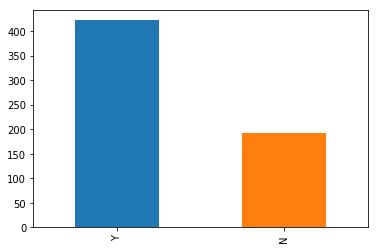

In [14]:
train['Loan_Status'].value_counts().plot.bar()

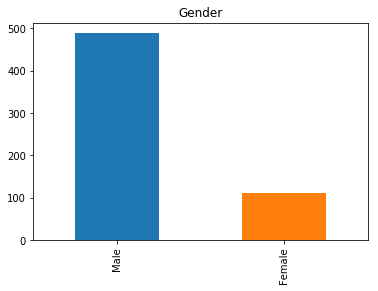

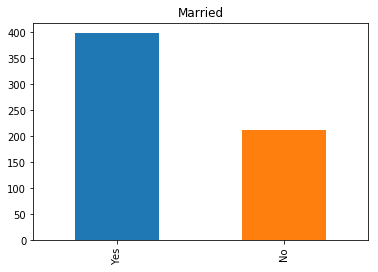

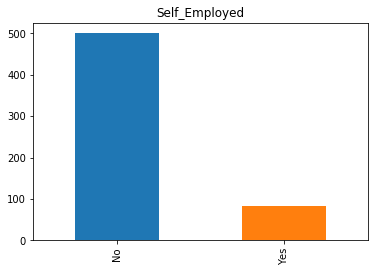

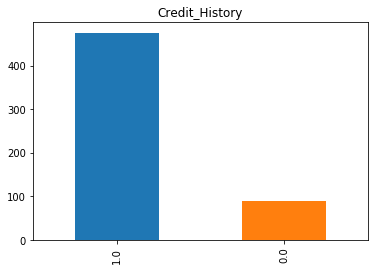

In [15]:
train['Gender'].value_counts().plot.bar(title = 'Gender')
plt.show()

train['Married'].value_counts().plot.bar(title = 'Married')
plt.show()
train['Self_Employed'].value_counts().plot.bar(title = 'Self_Employed')
plt.show()
train['Credit_History'].value_counts().plot.bar(title = 'Credit_History')
plt.show()

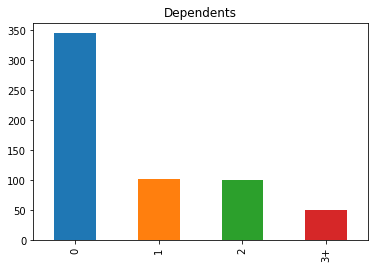

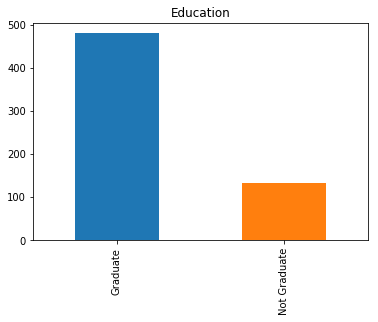

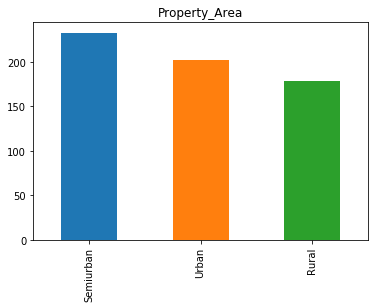

In [16]:
train['Dependents'].value_counts().plot.bar(title = 'Dependents')
plt.show()
train['Education'].value_counts().plot.bar(title = 'Education')
plt.show()
train['Property_Area'].value_counts().plot.bar(title = 'Property_Area')
plt.show()

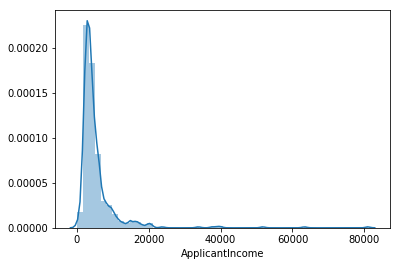

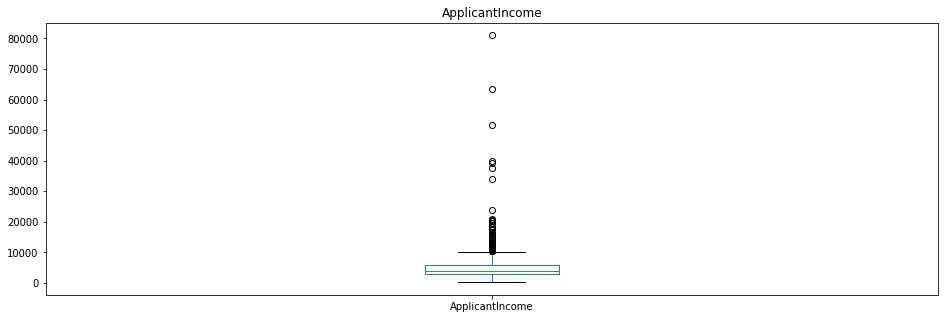

In [17]:
sns.distplot(train['ApplicantIncome'])
plt.show()
train['ApplicantIncome'].plot.box(figsize = (16,5),title = 'ApplicantIncome')

Text(0.5,0.98,'')

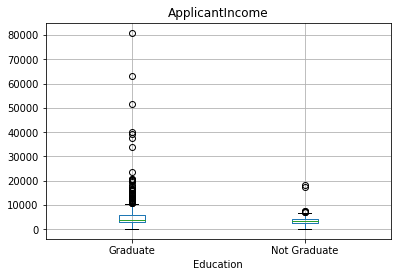

In [18]:
#segragating the ApplicantIncome with Education since there are outliers in ApplicantIncome
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

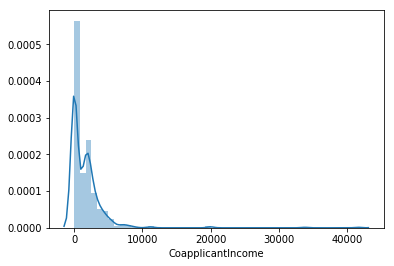

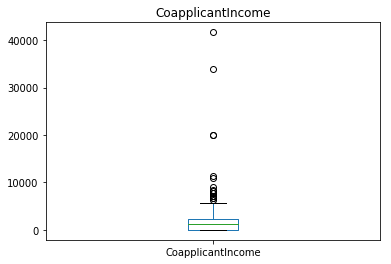

In [19]:
sns.distplot(train['CoapplicantIncome'])
plt.show()
train['CoapplicantIncome'].plot.box(title = 'CoapplicantIncome')

In [20]:
df=train.dropna()

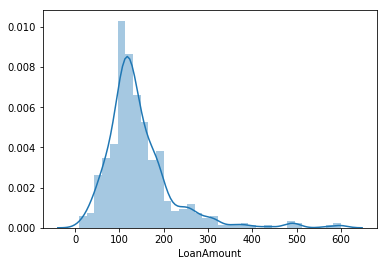

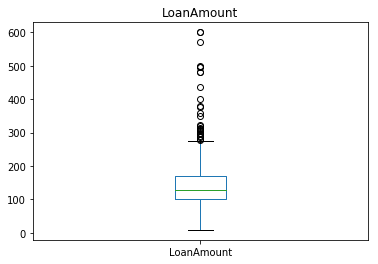

In [21]:
sns.distplot(df['LoanAmount'])
plt.show()
df['LoanAmount'].plot.box(title = 'LoanAmount')

In [22]:
#Bivariate Analysis
#Categorical Independent Variables vs target variable as Loan_status
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])

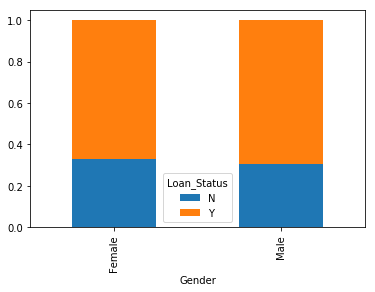

In [23]:
Gender.div(Gender.sum(1).astype(float),axis = 0).plot(kind="bar",stacked =True)

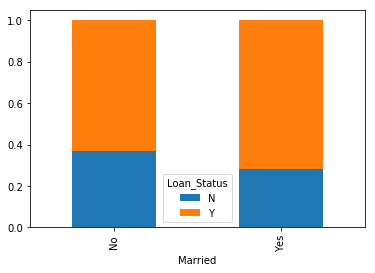

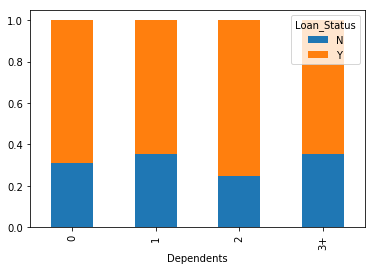

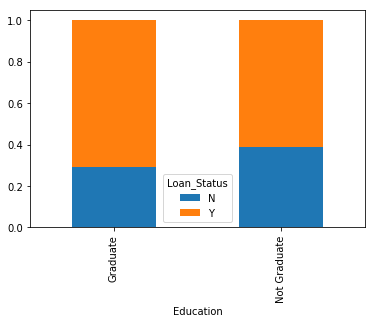

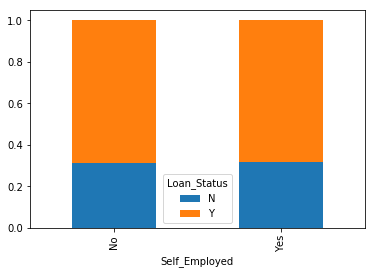

In [24]:
Married= pd.crosstab(train['Married'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float),axis = 0).plot(kind="bar",stacked = True)
plt.show()
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked = True)
plt.show()
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked =True)
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind = "bar",stacked = True)
plt.show()

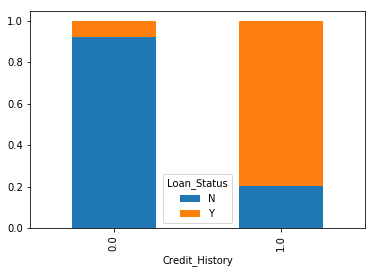

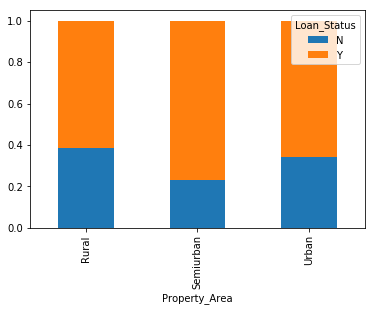

In [25]:
Credit_History= pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind = "bar",stacked = True)
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked = True)
plt.show()

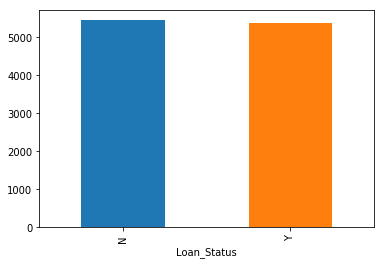

In [26]:
#Numerical Independent Variable vs target variable loan_status
#find mean of the variable
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0,0.5,'Percentage')

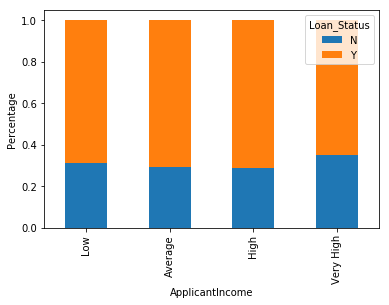

In [27]:
bins =[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Income_bin'] = pd.cut(df['ApplicantIncome'],bins, labels = group)
Income_bin =pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked = True)
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")

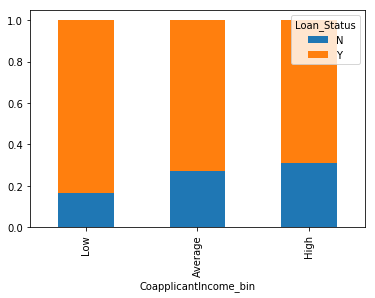

In [28]:
bins = [0,1000,3000,42000]
group = ['Low','Average', 'High']
train['CoapplicantIncome_bin'] = pd.cut(df['CoapplicantIncome'],bins, labels = group)
CoapplicantIncome_bin = pd.crosstab(train['CoapplicantIncome_bin'],train['Loan_Status'])
CoapplicantIncome_bin.div(CoapplicantIncome_bin.sum(1).astype(float),axis=0).plot(kind = "bar",stacked = True)
plt.xlabel = ("CoapplicantIncome")
plt.ylabel = ("Percentage")

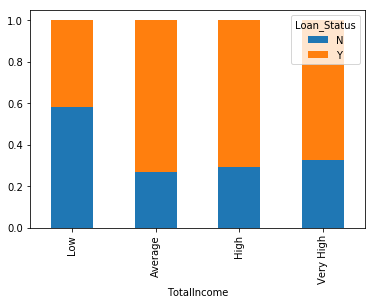

In [29]:
#in the above, the coapplicant income isnt affecting the loan_status and does not show the expected output, hence, combine the applicant and coapplicant income together and crosstab with loan status
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
bins= [0,2500, 4000,6000,81000]
group= ['Low', 'Average','High','Very High']
train['TotalIncome'] = pd.cut(train['Total_Income'],bins, labels = group)
TotalIncome =pd.crosstab(train['TotalIncome'],train['Loan_Status'])
TotalIncome.div(TotalIncome.sum(1).astype(float),axis =0).plot(kind="bar",stacked = True)
plt.xlabel = ("Total_Income")
plt.ylabel =("Percentage")

In [30]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,CoapplicantIncome_bin,Total_Income,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,High,High,9613.0,Very High
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Low,Average,3849.0,Average
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Average,Average,5540.0,High
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,High,Average,5532.0,High
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,Very High,High,23809.0,Very High


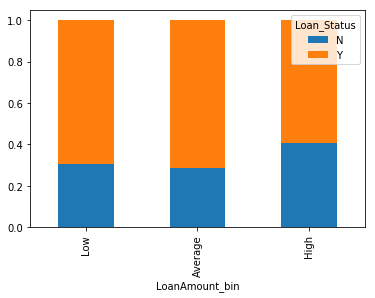

In [31]:
bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked = True)
plt.xlabel = ("LoanAmount_bin")
plt.ylabel = ("Percentage")

In [32]:
train = train.drop(['Income_bin','TotalIncome', 'LoanAmount_bin','CoapplicantIncome_bin'],axis=1)

In [33]:
train = train.drop(['Total_Income'],axis = 1)

In [34]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
train['Dependents'].replace('3+',3, inplace = True)
test['Dependents'].replace('3+',3, inplace = True)

In [36]:
train['Loan_Status'].replace('N',0,inplace = True)
train['Loan_Status'].replace('Y',1,inplace = True)

In [37]:
matrix = train.corr()

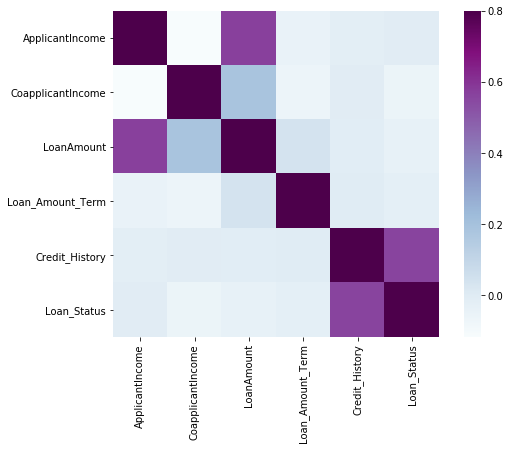

In [38]:
#the darker the color is, the more correlation with target variable
f, ax = plt.subplots(figsize =(9,6))
sns.heatmap(matrix,vmax =.8,square=True, cmap = "BuPu")

In [39]:
#for numerical values: replace with mean or median
#for categorical values: replace with mode(Gender, Married, Dependants, Credit_History, Self_Employed, Loan_Amount_Term)

In [40]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace= True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)

In [41]:
#Loan_Amount_Term, first look at the value counts of it
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [42]:
#will replace the missing values in Loan_Amount_term
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace= True)

In [43]:
# LoanAmount is the numerical vule column, so we will replace it by median of the values present
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

In [44]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [45]:
#replace the missing values in test data too
test['Gender'].fillna(train['Gender'].mode()[0], inplace= True)
test['Married'].fillna(train['Married'].mode()[0], inplace = True)
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace= True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

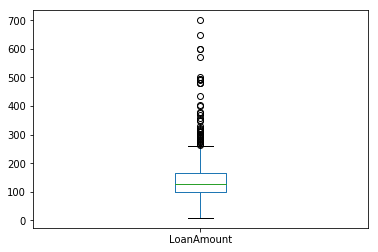

In [46]:
#Outlier Treatment(LoanAmount has the outliers that was detected in the univariate analysis)
#mean, median, mode, standard deviation and outliers has most significant effect on mean and standard deviation
train['LoanAmount'].plot.box()


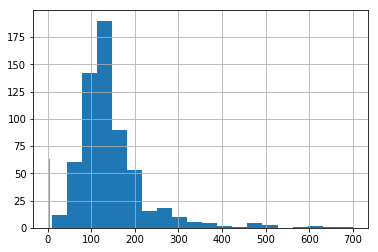

In [47]:
train['LoanAmount_Log']= np.log(train['LoanAmount'])
train['LoanAmount'].hist(bins = 20)
train['LoanAmount_Log'].hist(bins = 20)
test['LoanAmount_Log'] = np.log(test['LoanAmount'])

In [48]:
#first model (logistic regression)
#delete the columns that do not affect the tareget variable
train = train.drop('Loan_ID',axis = 1)
test= test.drop('Loan_ID', axis = 1)

In [49]:
#SKLearn wants the target variable in seperate dataset than the other data
x = train.drop('Loan_Status',axis=1)
y = train.Loan_Status

In [50]:
#Logistic regression takes only numerical values, we will change the Gender column having values as female and male with 0 and 1 respectively
x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [51]:
#train model on training dataset and make predictions for test data. to validate the predictions. So divide the train data into two parts - train and validatation
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size =0.3)

In [52]:
#Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [53]:
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7837837837837838

In [55]:
pred_test = model.predict(test)

In [56]:
submission=pd.read_csv("C:/Users/manja/Downloads/Sample_Submission_ZAuTl8O_FK3zQHh.csv")

In [57]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

In [58]:
submission

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
5,LP001054,1
6,LP001055,1
7,LP001056,0
8,LP001059,1
9,LP001067,1


In [59]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [60]:
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [61]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [62]:
"""instead of making the validation set out of training set to validate the predictions, we can also cross validate the results.
Some of the common methods of validations are
The validation set approach
k-fold cross validation
Leave one out cross validation (LOOCV)
Stratified k-fold cross validation

1. The validation set approach
we reserve 50% of the dataset for validation and the remaining 50% for model training
python: train, validation = train_test_split(data, test_size=0.50, random_state = 5)
R:      set.seed(101)
        sample <- sample.int(n = nrow(data), size = floor(.50*nrow(data)), replace = F)
        train <- data[sample, ]
        test  <- data[-sample, ]
        
https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/ """


'instead of making the validation set out of training set to validate the predictions, we can also cross validate the results.\nSome of the common methods of validations are\nThe validation set approach\nk-fold cross validation\nLeave one out cross validation (LOOCV)\nStratified k-fold cross validation\n\n1. The validation set approach\nwe reserve 50% of the dataset for validation and the remaining 50% for model training\npython: train, validation = train_test_split(data, test_size=0.50, random_state = 5)\nR:      set.seed(101)\n        sample <- sample.int(n = nrow(data), size = floor(.50*nrow(data)), replace = F)\n        train <- data[sample, ]\n        test  <- data[-sample, ]\n        \nhttps://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/ '

In [63]:
#we will apply the stratified k-fold cross validation
from sklearn.model_selection import StratifiedKFold

In [64]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test) 
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8278688524590164


TypeError: 'str' object is not callable

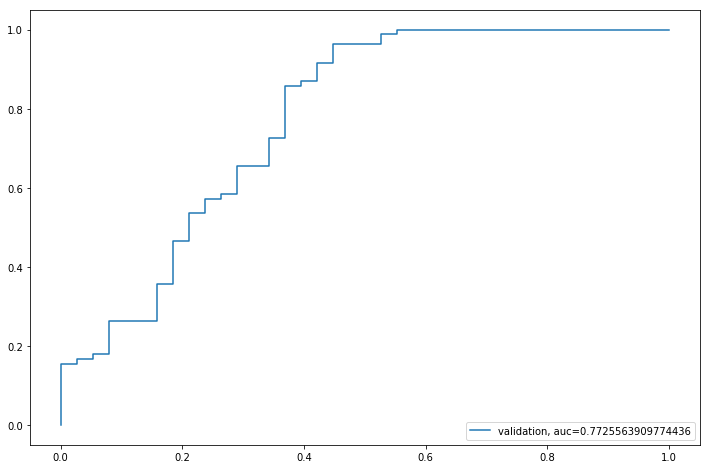

In [65]:
#mean validation is 0.81, visualize the ROC
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.legend(loc=4) 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [66]:
#validation accuracy is 0.77
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

In [67]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [68]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

In [69]:
"""Here we are substituting 3 variables in the dataset: 
Total_Income
EMI
Balance Income

Total_Income:As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.
EMI: EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
Balance Income: This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval."""

'Here we are substituting 3 variables in the dataset: \nTotal_Income\nEMI\nBalance Income\n\nTotal_Income:As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.\nEMI: EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.\nBalance Income: This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.'

In [70]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

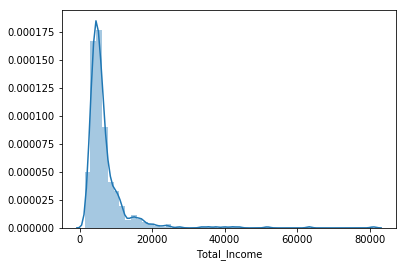

In [71]:
sns.distplot(train['Total_Income'])

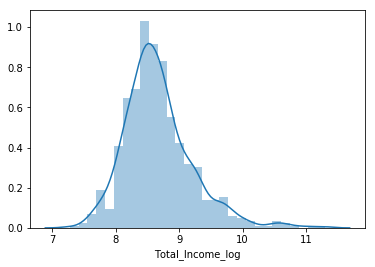

In [72]:
train['Total_Income_log']= np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])

In [73]:
test['Total_Income_log'] = np.log(test['Total_Income'])

In [74]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

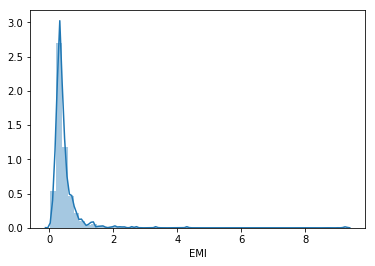

In [75]:
sns.distplot(train['EMI'])

In [76]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) 
# Multiply with 1000 to make the units equal 
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

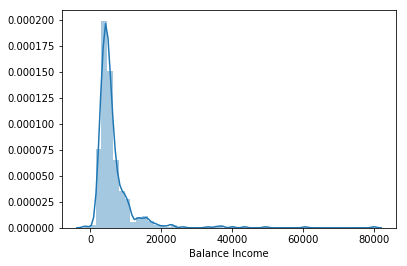

In [77]:
sns.distplot(train['Balance Income'])

In [78]:
#Let us now drop the variables which we used to create these new features. 
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [80]:
"""We will build the following models in this section.

Logistic Regression
Decision Tree
Random Forest
XGBoost"""
#Save the target varible in different dataset
x = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [86]:
#Logistic Regression
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score', score)     
    i+=1
pred_test = model.predict(test) 
pred=model.predict_proba(xvl)[:,1]

submission['Loan_Status']=pred_test #filling Loan_Status with predictions submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y 
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv')
#From this submission we got an accuracy of 0.798 on the leaderboard.


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.7786885245901639

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.819672131147541


In [87]:
#Decision Tree
from sklearn import tree

In [89]:
#Let’s fit the decision tree model with 5 folds of cross validation.
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test)
#from this submission we got an accuracy of 0.708 on the leaderboard

submission['Loan_Status']=pred_test            # filling Loan_Status with predictions submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y 
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv')


1 of kfold 5
accuracy_score 0.7258064516129032

2 of kfold 5
accuracy_score 0.7419354838709677

3 of kfold 5
accuracy_score 0.7049180327868853

4 of kfold 5
accuracy_score 0.680327868852459

5 of kfold 5
accuracy_score 0.7049180327868853


In [90]:
"""Random Forest
RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.
For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.
Final prediction can be a function of all the predictions made by the individual learners.
In case of regression problem, the final prediction can be mean of all the predictions."""

from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test)



1 of kfold 5
accuracy_score 0.8225806451612904

2 of kfold 5
accuracy_score 0.8145161290322581

3 of kfold 5
accuracy_score 0.7377049180327869

4 of kfold 5
accuracy_score 0.7295081967213115

5 of kfold 5
accuracy_score 0.8114754098360656


In [93]:
"""The mean validation accuracy for this model is 0.766

We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters. Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.

We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in random forest model."""
from sklearn.model_selection import GridSearchCV
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)),'n_estimators':list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)
# Fit the grid search model 
grid_search.fit(x_train,y_train)
GridSearchCV(cv=None, error_score='raise', estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,oob_score=False, random_state=1, verbose=0, warm_start=False), fit_params=None, iid=True, n_jobs=1,       
param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',scoring=None, verbose=0)
# Estimating the optimized value 
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=3, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1,oob_score=False, random_state=1, verbose=0, warm_start=False)


C:\Users\manja\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


'So, the optimized value for the max_depth variable is 3 and for n_estimator is 41. Now let’s build the model using these optimized values.'

In [96]:
"""So, the optimized value for the max_depth variable is 3 and for n_estimator is 41. Now let’s build the model using these optimized values."""
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test) 
pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8225806451612904

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7786885245901639

5 of kfold 5
accuracy_score 0.819672131147541


In [97]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y 
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random Forest.csv')

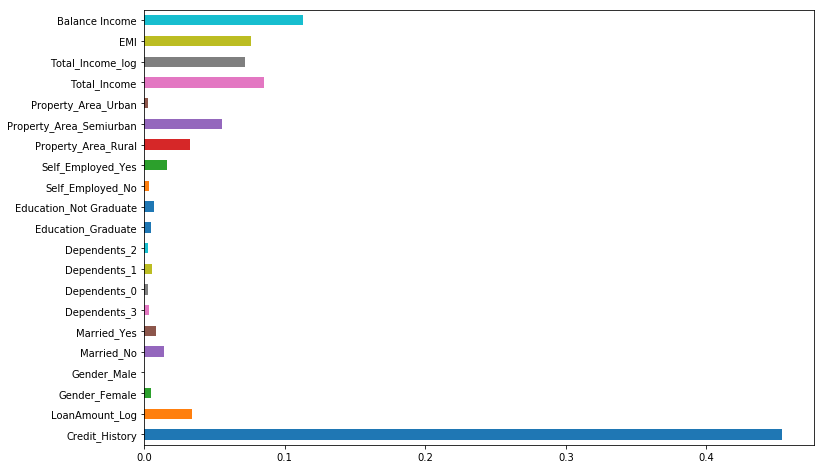

In [98]:
"""Let us find the feature importance now, i.e. which features are most important for this problem. We will use feature_importances_ attribute of sklearn to do so."""

importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))